# Analysis and prediction of Temperature and dissolved oxygen time series

## Summary 

## Introduction 

## Method

## Observation and interpretation of datas

## Visualisation of datas 


Firstly we will load temperature and oxygen data on python, in order to visualize what data looks like.

In [2]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [3]:
# find the path in which I work 
current_path=os.getcwd()


dataset_name="Long Term River Station Data ATHAB TOWN.xlsx"

current_path

'C:\\Users\\Samuel\\Desktop\\Rendu SPI'

In [4]:
#load the dataset 
dataset=pd.read_excel(dataset_name,skiprows=2,header=1,index_col='Sample Date',parse_dates=["Sample Date"])
dataset.tail(1)
dataset

,Station No.,Station Name Description,Latitude (Decimal Degrees),Unnamed: 3,Unnamed: 4,Longitude (Decimal Degrees),Sample Matrix,Sample Type,Collection Code,Sample Comment,...,Chloride Dissolved (Cl) mg/L,Sulphate Dissolved (SO4) mg/L,Calcium Dissolved (Ca) mg/L,Magnesium Dissolved (Mg) mg/L,Sodium Dissolved (Na) mg/L,Potassium Dissolved (K) mg/L,Fluoride Dissolved (F) mg/L,Fecal Coliforms No/100 mL,E. Coli No/100 mL,Cyanide µg/L
Sample Date,,,,,,,,,,,,,,,,,,,,,
1987-02-17 16:50:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,1,NaN,NaN,...,6.0,42.0,53.0,13.0,11.0,1.5,0.13,NaN,NaN,NaN
1987-03-18 12:30:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,1,NaN,NaN,...,6.2,41.7,53.7,15.7,11.6,1.6,0.10,NaN,NaN,NaN
1987-04-15 12:00:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,1,NaN,NaN,...,4.1,20.2,34.0,7.2,8.5,3.1,0.08,NaN,NaN,NaN
1987-05-28 16:30:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,1,NaN,NaN,...,2.4,21.8,37.6,8.9,7.4,1.3,0.07,NaN,NaN,NaN
1987-06-17 07:30:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,1,NaN,NaN,...,1.0,17.0,22.5,9.0,3.2,0.7,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16 14:00:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,14,128.0,Main Sample. QC Duplicate Organics & MeHgs (23...,...,2.0,59.0,60.0,17.0,18.0,2.1,NaN,L10,L10,NaN
2023-03-08 11:00:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,14,128.0,Main Sample. QC Organics + MeHgs Duplicate (23...,...,2.4,57.0,58.0,16.0,18.0,2.1,NaN,30,20,NaN
2023-04-05 13:30:00,AB07BE0010,ATHABASCA RIVER AT TOWN OF ATHABASCA,54.72222,NaN,NaN,-113.28611,0,14,128.0,Sampled at augered hole adjacent to sonde depl...,...,2.9,58.0,56.0,16.0,17.0,1.9,NaN,30,L10,NaN


We are interested in extracting Temperature and Dissolved oxygen features. 

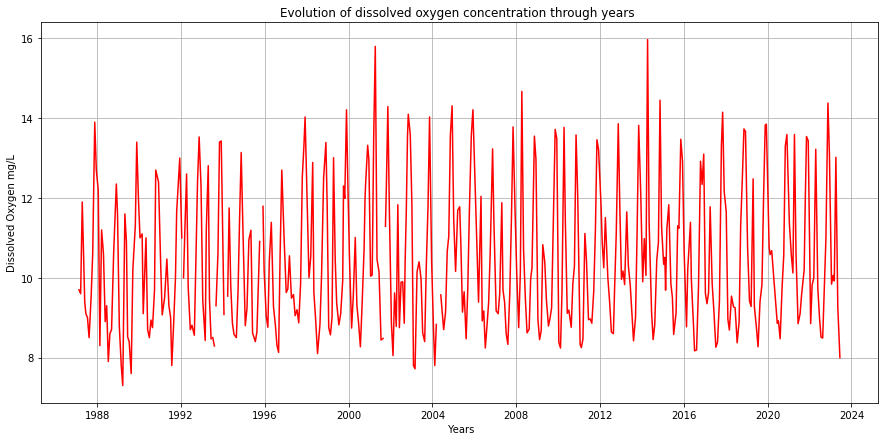

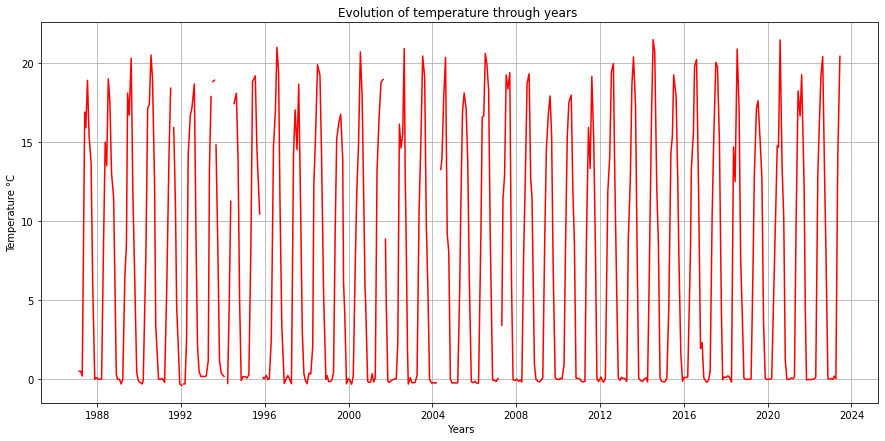

In [5]:
#Plot raw dataset
data=dataset[["Dissolved Oxygen mg/L","Water Temperature °C"]]
#dataset=dataset.dropna()
plt.figure(figsize=(15,7))
plt.plot(data["Dissolved Oxygen mg/L"],color='red')
plt.title("Evolution of dissolved oxygen concentration through years ")
plt.xlabel(" Years")
plt.ylabel("Dissolved Oxygen mg/L")
plt.grid()
plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\Evolution of dissolved oxygen concentration through years.jpeg")


plt.figure(figsize=(15,7))
plt.plot(data["Water Temperature °C"],color='red')
plt.title("Evolution of temperature through years ")
plt.xlabel(" Years")
plt.ylabel("Temperature °C")
plt.grid()
plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\Evolution of temperature through years.jpeg")


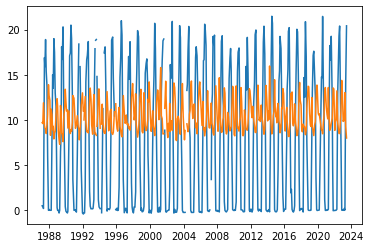

In [6]:



T=data["Water Temperature °C"].to_frame()
O2=data["Dissolved Oxygen mg/L"].to_frame()

plt.plot(T)
plt.plot(O2)
#save raw dataset plots
T.to_csv(r'C:\Users\Samuel\Desktop\Rendu SPI\Rawsdataset temp.csv', index=True)
O2.to_csv(r'C:\Users\Samuel\Desktop\Rendu SPI\Rawdataset O2.csv', index=True)



(437,)

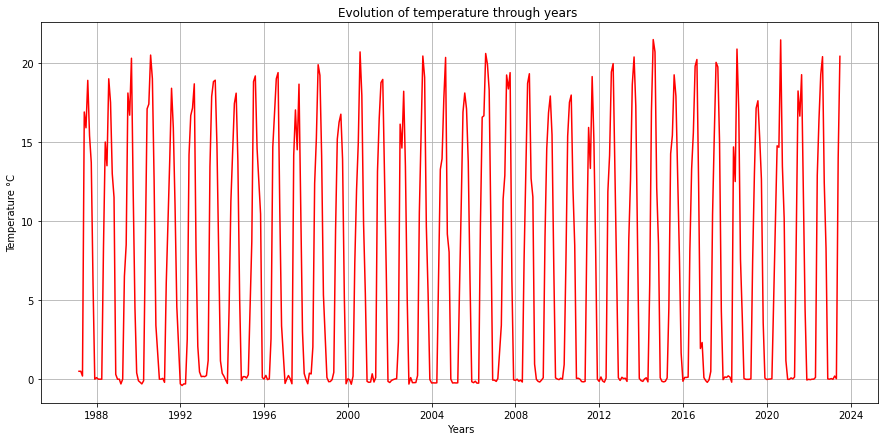

In [7]:
plt.figure(figsize=(15,7))
#realize a monthly mean
monthly_avg_temp = T['Water Temperature °C'].resample("M").mean()
#Linear interpolation to fill misssing values
monthly_avg_temp_fillmean = monthly_avg_temp.interpolate(method='linear',)

plt.plot(monthly_avg_temp_fillmean,color='red')

plt.title("Evolution of temperature through years ")
plt.xlabel(" Years")
plt.ylabel("Temperature °C")
plt.grid()
plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\preprotemp.jpeg")


monthly_avg_temp_fillmean.isna().sum()
monthly_avg_temp_fillmean=monthly_avg_temp_fillmean.dropna()

monthly_avg_temp_fillmean.shape


(437,)

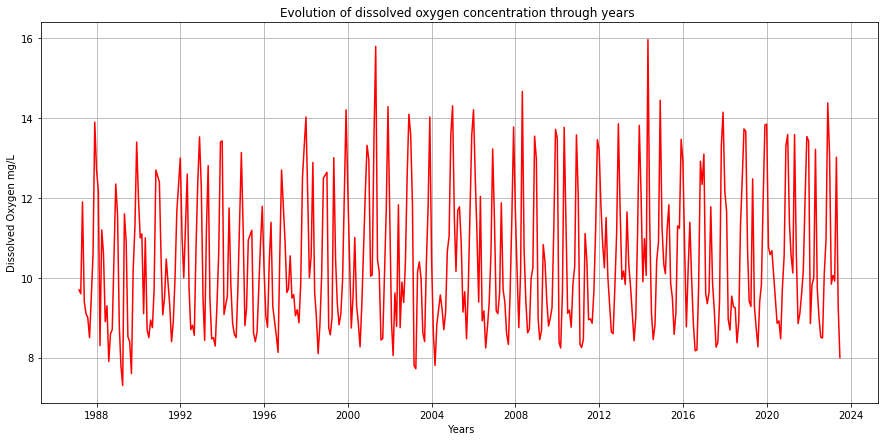

In [8]:
monthly_avg_O2 =O2["Dissolved Oxygen mg/L"].resample("M").mean()

monthly_avg_O2_fillmean = monthly_avg_O2.interpolate(method='linear',)
plt.figure(figsize=(15,7))
plt.title("Evolution of dissolved oxygen concentration through years ")
plt.xlabel(" Years")
plt.ylabel("Dissolved Oxygen mg/L")
plt.grid()
plt.plot(monthly_avg_O2_fillmean,color='red')
plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\PreproO2.jpeg")

monthly_avg_O2_fillmean = monthly_avg_O2.interpolate(method='linear',)

monthly_avg_O2_fillmean.shape




What can we say about these time series ?

- These are time series. So we can use auto-regressive models on ther series
- It is hard to see any mooving average
- There is seasonality, above all about Temperature serie 
- At first sight there is no stationarity, above all at the begining of the series

As we need to predict the evolution of time serie, with all points mentionned early, we can use the SARIMA model.

## Stationarity

The stationarity is constancy of statistics values (mean, std...) through time. 
To be more precise, three rules must be followed:
- The mean of the time serie must be constant 
- The standard deviation of the time serie must be constant 
- There is no seasonality 

In order to verify if a time serie is stationary, we can use the Dickey-Fuller P-value. Under 0.05 the time serie is considered as stationary. Above it is considerd as not stationary.

In [9]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=(15,7))
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Dissolved oxygen concentration \n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\Evolution of do2 statiotest.jpeg")

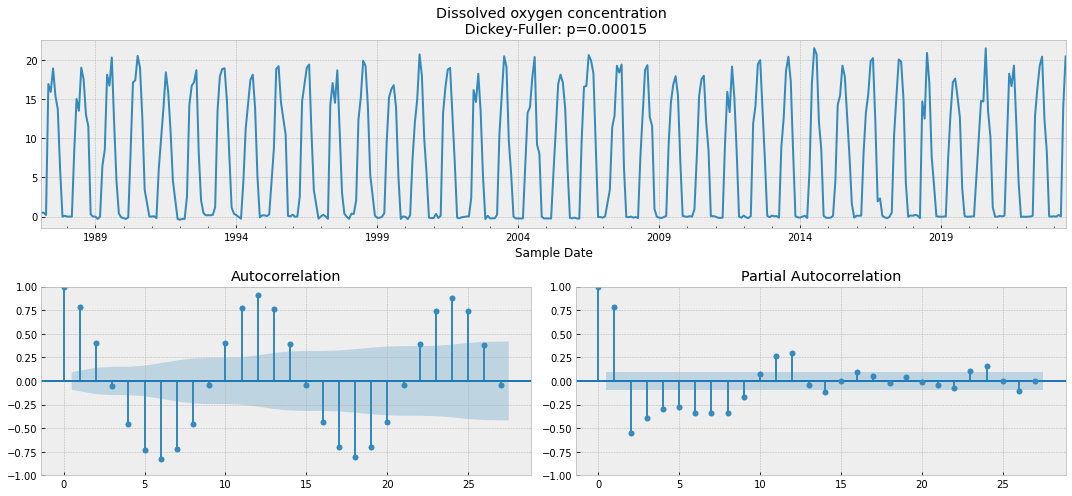

In [10]:

#tsplot(scaled_data)
tsplot(monthly_avg_temp_fillmean)

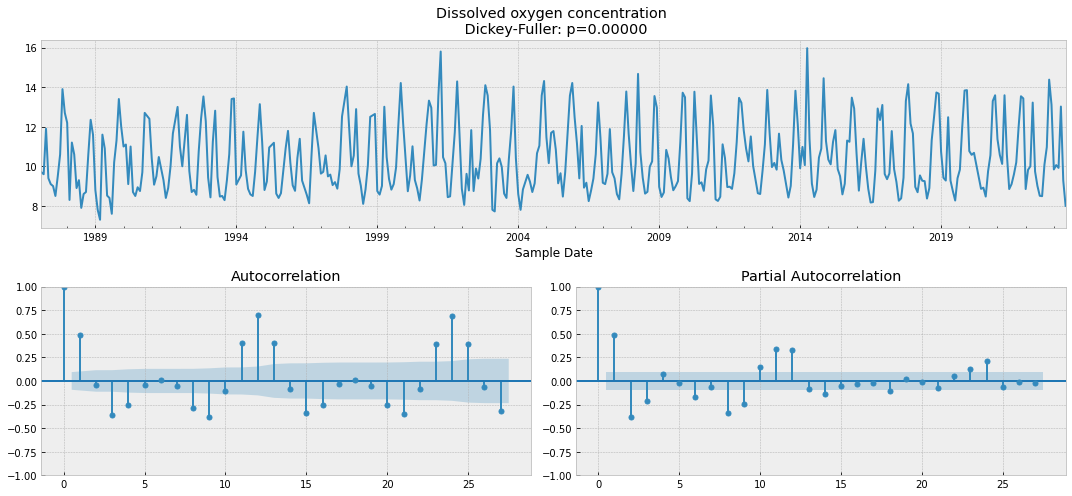

In [11]:
tsplot(monthly_avg_O2_fillmean)

According to the initial dataset, the sampling of water quality is realized monthly. By looking at the plots of time series, there is a pattern which appears each year. Hence the seasonal period is 12 months.

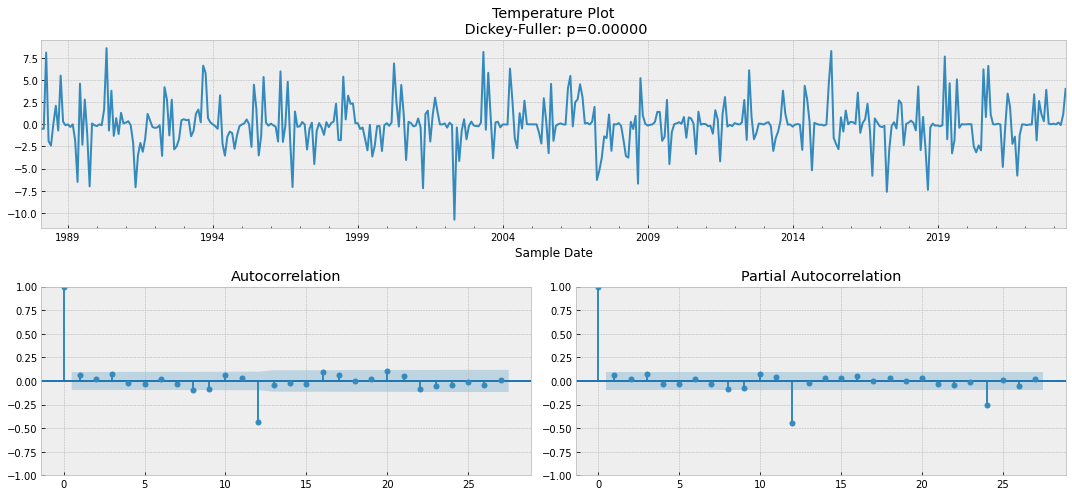

In [12]:
stationary_ts_T = monthly_avg_temp_fillmean-monthly_avg_temp_fillmean.shift(12)

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=(15,7))
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Temperature Plot\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\Ev of temp stat.jpeg")

tsplot(stationary_ts_T[12:])


The P_value is equal to 0. So the time serie is now stationary.

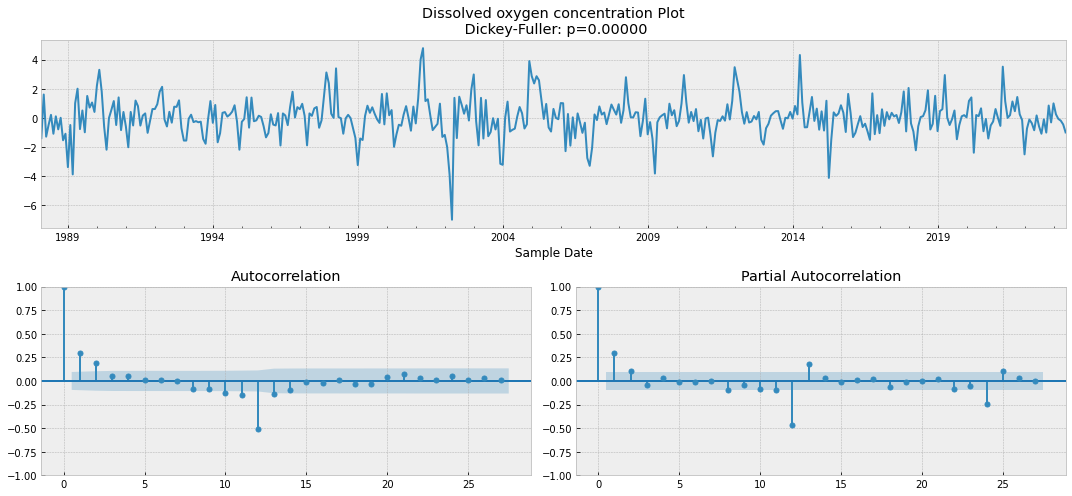

In [13]:
#Make series stationnary 
stationary_ts_O =monthly_avg_O2_fillmean-monthly_avg_O2_fillmean.shift(12)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=(15,7))
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Dissolved oxygen concentration Plot\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        plt.savefig(r"C:\Users\Samuel\Desktop\Rendu SPI\do2stat.jpeg")
tsplot(stationary_ts_O[12:])


The number of significant lags is not to important. Non seasonal differenciations is not necessary.

### SARIMA method

In order to use the SARIMA il faut déterminer différent paramètres (p,q,d), (P,D,Q,s).

The parameter p is related to the auto-regression model. It represents the number of significant peaks after which there is no other significant peaks (on the figure of partial Autocorrelation).p=4 for both PACF figures.

In [14]:
p_T,p_DO=[i for i in range(1,4)],[i for i in range(1,5)]
p_T

[1, 2, 3]

The parameter q is related to the moving average model. It represents the number of significant peaks after which there is no other significant peaks (on the figure of Autocorrelation).p=4 for both ACF figures.

In [15]:
q_T,q_DO=[i for i in range(1,3)],[i for i in range(1,5)]
q_T

[1, 2]

The parameter d is related to the order integration (I in SRARIMA). It is the number of non seasonal differences which was realized. d=0

In [16]:
d_T=0
d_O2=0

The parameter P is the order of the autoregression for the seasonal component. P is the number of significant multiples of the season (12) in the PACF figure.

In [17]:
P_T,P_DO=range(1,3),range(1,3)


The parameter D is the order of seasonal integration. D=0 if we didn't made any seasonal integration. D=1 if we did. 

In [18]:
D=1

The parameter Q is the order of the moving average method for the seasonal component. Q is the number of significant multiples of the season (12) in the ACF figure.

In [19]:
Q_T,Q_DO=range(0,3),range(0,3)
Q_T

range(0, 3)

Finally S is the seasonality. It is the lenght of the season period. S=12

In [20]:
s=12

We can create a list with all combination of parameters above. It will allow to find the better combination of parameters. 

In [21]:
from itertools import product 

parameters_T=list(product(p_T,q_T,P_T,Q_T))
parameters_DO=list(product(p_DO,q_DO,P_DO,Q_DO))
print(len(list(parameters_T)),parameters_T)


36 [(1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 0), (1, 1, 2, 1), (1, 1, 2, 2), (1, 2, 1, 0), (1, 2, 1, 1), (1, 2, 1, 2), (1, 2, 2, 0), (1, 2, 2, 1), (1, 2, 2, 2), (2, 1, 1, 0), (2, 1, 1, 1), (2, 1, 1, 2), (2, 1, 2, 0), (2, 1, 2, 1), (2, 1, 2, 2), (2, 2, 1, 0), (2, 2, 1, 1), (2, 2, 1, 2), (2, 2, 2, 0), (2, 2, 2, 1), (2, 2, 2, 2), (3, 1, 1, 0), (3, 1, 1, 1), (3, 1, 1, 2), (3, 1, 2, 0), (3, 1, 2, 1), (3, 1, 2, 2), (3, 2, 1, 0), (3, 2, 1, 1), (3, 2, 1, 2), (3, 2, 2, 0), (3, 2, 2, 1), (3, 2, 2, 2)]


Then by using the function below, the best combination of parameters will be determined. 

In [22]:


def optimizeSARIMA(parameters_list, d, D, s,data):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    result_table.to_csv(r'C:\Users\Samuel\Desktop\Rendu SPI\result_table_dO2.csv', index=False)
    
    return result_table

In [23]:
train_percent=[0.96]#[0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.96]

train_bank_T, test_bank_T = [], []
n_test_points = 24

for k in range(len(train_percent)):
    print('Le fold {} :'.format(k+1))
    n_samples = len(monthly_avg_temp_fillmean.to_frame())
    n_train = int(n_samples * train_percent[k])
    n_test = n_samples-n_train
    
    train_bank_T.append(monthly_avg_temp_fillmean.to_frame()[:n_train])
    test_bank_T.append(monthly_avg_temp_fillmean.to_frame()[n_train:n_train+n_test_points])
    print("test : {}\n train : {} ".format(train_bank_T,test_bank_T))
    


Le fold 1 :
test : [             Water Temperature °C
Sample Date                      
1987-02-28                   0.50
1987-03-31                   0.50
1987-04-30                   0.20
1987-05-31                  16.90
1987-06-30                  15.90
...                           ...
2021-08-31                  19.26
2021-09-30                  12.08
2021-10-31                   4.38
2021-11-30                  -0.05
2021-12-31                  -0.01

[419 rows x 1 columns]]
 train : [             Water Temperature °C
Sample Date                      
2022-01-31                  -0.03
2022-02-28                   0.00
2022-03-31                   0.00
2022-04-30                   0.11
2022-05-31                  12.89
2022-06-30                  16.42
2022-07-31                  19.27
2022-08-31                  20.40
2022-09-30                  12.43
2022-10-31                   8.28
2022-11-30                   0.02
2022-12-31                   0.00
2023-01-31                 

In [24]:
train_bank_O2,test_bank_O2=[],[]
n_test_points = 24

for k in range(len(train_percent)):
    print('Le fold {} :'.format(k+1))
    n_samples = len(monthly_avg_O2_fillmean.to_frame())
    n_train = int(n_samples * train_percent[k])
    n_test = n_samples-n_train
    
    train_bank_O2.append(monthly_avg_O2_fillmean.to_frame()[:n_train])
    test_bank_O2.append(monthly_avg_O2_fillmean.to_frame()[n_train:n_train+n_test_points])
    print("test : {}\n train : {} ".format(train_bank_O2,test_bank_O2))
    

Le fold 1 :
test : [             Dissolved Oxygen mg/L
Sample Date                       
1987-02-28                    9.70
1987-03-31                    9.60
1987-04-30                   11.90
1987-05-31                    9.40
1987-06-30                    9.10
...                            ...
2021-08-31                    9.59
2021-09-30                   10.20
2021-10-31                   11.99
2021-11-30                   13.54
2021-12-31                   13.43

[419 rows x 1 columns]]
 train : [             Dissolved Oxygen mg/L
Sample Date                       
2022-01-31                    8.85
2022-02-28                    9.82
2022-03-31                   10.00
2022-04-30                   13.22
2022-05-31                    9.74
2022-06-30                    9.01
2022-07-31                    8.51
2022-08-31                    8.49
2022-09-30                   10.09
2022-10-31                   10.97
2022-11-30                   14.38
2022-12-31                   13.11


In [25]:

import dill
with open('dico_Temp_FMM.pkl', 'rb') as f:
    dico_fold_bparam= dill.load(f)

# Accédez à la variable importée dans le notebook 2
print(dico_fold_bparam)

with open('dico_O2_FMM.pkl', 'rb') as f:
    dico_fold_bparam_O2= dill.load(f)

# Accédez à la variable importée dans le notebook 2
print(dico_fold_bparam)
print(dico_fold_bparam_O2)


{'Le fold 1 :': [1, 1, 1, 1]}
{'Le fold 1 :': [1, 1, 1, 1]}
{'Le fold 1 :': [4, 2, 0, 1]}


In [26]:
#entrainement des folds 
trained_models_T={}
for fold in range(len(dico_fold_bparam)):
    param=dico_fold_bparam['Le fold {} :'.format(fold+1)]
    
    train_fold=sm.tsa.statespace.SARIMAX(train_bank_T[fold], order=(param[0], d_T, param[1]), 
                                        seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
    trained_models_T["{}".format(fold)]=train_fold
    print(trained_models_T["{}".format(fold)].summary())




                                     SARIMAX Results                                      
Dep. Variable:               Water Temperature °C   No. Observations:                  419
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -856.787
Date:                            Fri, 08 Mar 2024   AIC                           1723.575
Time:                                    22:46:44   BIC                           1743.619
Sample:                                02-28-1987   HQIC                          1731.507
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3402      0.380      0.895      0.371      -0.405       1.085
ma.L1         -0.2178      0.387   

In [27]:
trained_models_O2={}
for fold in range(len(dico_fold_bparam_O2)):
    param=dico_fold_bparam_O2['Le fold {} :'.format(fold+1)]
    
    train_fold=sm.tsa.statespace.SARIMAX(train_bank_O2[fold], order=(param[0], d_T, param[1]), 
                                        seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
    trained_models_O2["{}".format(fold)]=train_fold
    print(trained_models_O2["{}".format(fold)].summary())

                                      SARIMAX Results                                       
Dep. Variable:                Dissolved Oxygen mg/L   No. Observations:                  419
Model:             SARIMAX(4, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -541.422
Date:                              Fri, 08 Mar 2024   AIC                           1098.845
Time:                                      22:46:50   BIC                           1130.915
Sample:                                  02-28-1987   HQIC                          1111.537
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6453      0.049    -13.231      0.000      -0.741      -0.550
ar.L2         -0.61

C:\Users\Samuel\.conda\envs\spyder-cf\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
from datetime import datetime, timedelta
from pandas.tseries.offsets import DateOffset
from dateutil.relativedelta import relativedelta
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


import matplotlib.colors as mcolors
from scipy.stats import linregress

import numpy as np


def plot_corr_plot(train_bank, modeled_values,x_label_corr,y_label_corr,fold): 
    #train_bank = train_bank.drop('saison', axis=1)
    x = train_bank["Water Temperature °C"].values
    y = modeled_values.values
    
    

    slope, intercept, r_value, _, _ = linregress(x, y)
    r_squared=r_value**2
    # Plot model vs predicted values and regression line
    plt.figure(figsize=(15, 7))
    plt.title("Correlation figure",fontsize=25, fontweight='bold')#+ ' training part on fold {}'.format(fold+1))
    print('Fold {} \n R squared_train: {:.2f} \nSlope_train: {:.2f} \nIntercept_train: {:.2f}'.format(fold+1,r_squared, slope, intercept, ))
 
    plt.scatter(x, y, label="model")
    plt.plot(x, slope * x + intercept, color='r', label='linear regression')
   
    plt.xlabel(x_label_corr,fontsize=25, fontweight='bold')
    plt.ylabel(y_label_corr,fontsize=25, fontweight='bold')
    plt.xticks(fontsize=16,fontweight='bold')
    plt.yticks(fontsize=16,fontweight='bold')
    plt.legend()
    plt.grid(True,linewidth=3, linestyle='--', alpha=1)
   
    #plt.annotate(f'R² = {r_squared:.2f} \n slope={ slope:.2f}\n intercept= {intercept:.2f}', xy=(np.max(x)/1.5, np.max(y)/4), xycoords='data', color='black', ha='center', va='center',fontsize=15)
    plt.savefig(r'C:\Users\Samuel\Desktop\Rendu SPI\O2linregtrain TOAAAAAA {}.jpg'.format(fold+1))

    Root_Mean_squared_error =np.sqrt( mean_squared_error(x,y))
    Median_absolute_error=median_absolute_error(x,y)
    Mean_absolute_error=mean_absolute_error(x,y)
    Moyenne_des_erreurs=(Root_Mean_squared_error+Median_absolute_error+Mean_absolute_error)/3
    #Mean_squared_log_error=mean_squared_log_error(test_bank_T, forecast[start_index:end_index])
    Mean_absolute_percentage_error=mean_absolute_percentage_error(x,y)
    
    Errors_formulas=["Root_Mean_squared_error","Median_absolute_error","Mean_absolute_error","Moyenne_des_erreurs","Mean_absolute_percentage_error",]
    Errors_values=[Root_Mean_squared_error,Median_absolute_error,Mean_absolute_error,Moyenne_des_erreurs,Mean_absolute_percentage_error,]
    
    data_error=pd.DataFrame([Errors_formulas, Errors_values])
    
    data_error.to_csv(r'C:\Users\Samuel\Desktop\Rendu SPI\Erreurs temp_trainTOAAAAAAA {}.csv'.format(fold+1), index=False)
    return 



def plotSARIMA(fold,series, model,test_bank_T,train_bank_T,x_label_corr="Observed Temperature", y_label_corr="Predicted temperature",value_pred="Temperature °C",corr_title='Correlation figure', pred_title="Model and predicted values"):
    """
    Plots model vs predicted values
        
    series - dataset with timeseries
    model - fitted SARIMA model
    n_steps - number of steps to predict in the future
    """
    test_bank_T['saison'] = None
    print('Train on {:.2f} % of the dataset, fold {}'.format(100*len(train_bank_T)/len(series),fold+1))
    print('Test on {:.2f} % of the dataset, fold {}'.format(100*len(test_bank_T)/len(series),fold+1))
    # Define s and d values
    s = 12
    d = 1
    
    
    # Adding model values
    data=series.copy()
    
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    data['arima_model'].dropna()
    
   
    # Making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    #print(data['arima_model'].isna().sum()==len(data['arima_model']))
    #print(data['arima_model'].last_valid_index())
    forecast_from_date=data['arima_model'].last_valid_index()
    gap=pd.DateOffset(months=s+d)
    
    # Forecasting on n_steps forward
    
    n_steps=len(data)-(len(data['arima_model'].dropna())+s+d)+24
    
    
    

    
    forecast_index = pd.date_range(start=forecast_from_date, periods=n_steps+1, freq="M")
    
    forecast = model.get_forecast(steps=n_steps)
   
    forecast = forecast.predicted_mean
  
    
   
   
   
    
    forecast.index = forecast_index[1:]
   
    duplicates_mask = forecast.index.duplicated()
   
    
    
    
   
  
    # Concatenate model values with forecast
    forecast = pd.concat([data['arima_model'], forecast])
    index_sans_doublons=forecast.index.drop_duplicates()
    forecast = forecast.groupby(forecast.index).mean()
    forecast=forecast.reindex(index_sans_doublons)
    

    #model_values = data['arima_model']
    #forecast_values = forecast

    #combined_values = pd.Series(np.concatenate([model_values.values, forecast_values.values]), index=model_values.index.append(forecast_values.index))

    
    # Calculate error, again having shifted on s+d steps from the beginning
    start_index=test_bank_T.index[0]
    end_index=test_bank_T.index[-1]
    
    deb_prev=forecast_from_date
    fin_prev=forecast.index[forecast.index.get_loc(deb_prev)+len(data['actual'][start_index:end_index])]
  
    

    fc=forecast.to_frame()
 
    test_bank_T = test_bank_T.drop('saison', axis=1) 
    Root_Mean_squared_error =np.sqrt( mean_squared_error(test_bank_T, fc[start_index:end_index]))
    Median_absolute_error=median_absolute_error(test_bank_T, fc[start_index:end_index])
    Mean_absolute_error=mean_absolute_error(test_bank_T, fc[start_index:end_index])
    Moyenne_des_erreurs=(Root_Mean_squared_error+Median_absolute_error+Mean_absolute_error)/3
    #Mean_squared_log_error=mean_squared_log_error(test_bank_T, forecast[start_index:end_index])
    Mean_absolute_percentage_error=mean_absolute_percentage_error(test_bank_T, fc[start_index:end_index])
    
    Errors_formulas=["Root_Mean_squared_error","Median_absolute_error","Mean_absolute_error","Moyenne_des_erreurs","Mean_absolute_percentage_error",]
    Errors_values=[Root_Mean_squared_error,Median_absolute_error,Mean_absolute_error,Moyenne_des_erreurs,Mean_absolute_percentage_error,]
    
    data_error=pd.DataFrame([Errors_formulas, Errors_values])
    
    data_error.to_csv(r'C:\Users\Samuel\Desktop\Rendu SPI\Erreur temp test TOA {}.csv'.format(fold+1), index=False)
    plot_corr_plot(train_bank_T[forecast.index[np.argmax(~np.isnan(forecast))]+pd.DateOffset(days=0):],forecast[forecast.index[np.argmax(~np.isnan(forecast))]:forecast_from_date],x_label_corr,y_label_corr,fold)
    # Fit a linear regression line
    x = test_bank_T.values
    y = fc[start_index:end_index].values
    
    
    # Exclude missing values
    
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    slope, intercept, r_value, _, _ = linregress(x, y)
    r_squared=r_value**2
    # Plot model vs predicted values and regression line
    plt.figure(figsize=(15, 7))
    plt.title(corr_title+ ' testing part on fold {}'.format(fold+1))
     # Créer une colonne vide pour les saisons
    
# Parcourir chaque date dans l'index
    cmap = mcolors.ListedColormap(['blue', 'green', 'red', 'orange'])
    test_bank_T['saison'] = None
    for date in test_bank_T.index:
        month = date.month
         # Créer une colonne vide pour les saisons

        # Associer la saison en fonction du mois
        if month in [12, 1, 2]:  # Hiver : décembre, janvier, février
            saison = 'hiver'
        elif month in [3, 4, 5]:  # Printemps : mars, avril, mai
            saison = 'printemps'
        elif month in [6, 7, 8]:  # Été : juin, juillet, août
            saison = 'été'
        else:  # Automne : septembre, octobre, novembre
            saison = 'automne'

    # Assigner la saison à la ligne correspondante dans la colonne "saison"
        test_bank_T.loc[date, 'saison'] = saison
    
    # Create a colormap based on the seasonal colors
    test_bank_T['saison'] = test_bank_T['saison'].map({'hiver': 0, 'printemps': 1, 'été': 2, 'automne': 3})

# Create a colormap based on the seasonal colors
    couleurs_saisons = {'hiver': 'blue', 'printemps': 'green', 'été': 'red', 'automne': 'orange'}
    cmap = mcolors.ListedColormap(list(couleurs_saisons.values()))

# Rest of the code remains the same
    #print('train forecast',forecast[forecast.index[np.argmax(~np.isnan(forecast))]:forecast_from_date],train_bank_T[forecast.index[np.argmax(~np.isnan(forecast))]+pd.DateOffset(days=1):])
    
    plt.scatter(test_bank_T.iloc[:,0], y, c=test_bank_T['saison'], cmap=cmap, label="model")
    plt.plot(x, slope * x + intercept, color='r', label='linear regression')
    #plt.plot()
    plt.xlabel(x_label_corr,fontsize=25, fontweight='bold')
    plt.ylabel(y_label_corr,fontsize=25, fontweight='bold')
    plt.xticks(fontsize=16,fontweight='bold')
    plt.yticks(fontsize=16,fontweight='bold')
    plt.legend()
    plt.grid(True,linewidth=3, linestyle='--', alpha=1)
    #plt.annotate(f'R² = {r_squared:.2f} \n slope={ slope:.2f}\n intercept= {intercept:.2f}', xy=(np.max(x)/1.5, np.max(y)/4), xycoords='data', color='black', ha='center', va='center',fontsize=15)
    plt.savefig(r'C:\Users\Samuel\Desktop\Rendu SPI\O2linregtest foldTOAAAAA {}.jpg'.format(fold+1))

    print('Fold number {} \n R squared: {:.2f} \nSlope: {:.2f} \nIntercept: {:.2f}'.format(fold+1, r_squared, slope, intercept))
    
    # Plot forecast and actual values
    test_bank_T.drop('saison', axis=1, inplace=True)
    plt.figure(figsize=(15, 7))
    #plt.title("{} \n on fold {}".format(pred_title,fold+1))
    plt.title("{} ".format(pred_title),fontsize=25, fontweight='bold')
    plt.plot(forecast, color='r', label="model")
    # Correlation plot for training part
    
   
 
    #plt.plot(combined_values, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    #plt.axvspan(forecast.index[0]+gap, forecast_from_date, alpha=0.5, color='lightgreen')
    plt.axvspan(train_bank_T.index[0]+gap, forecast_from_date, alpha=0.5, color='lightgreen')
    plt.axvspan(test_bank_T.index[0],test_bank_T.index[-1], alpha=0.5, color='lightcoral')
    
    plt.plot(data['actual'], label="actual")
    plt.xlabel("Year",fontsize=25, fontweight='bold')
    plt.ylabel(value_pred,fontsize=25, fontweight='bold')
    plt.xticks(fontsize=16,fontweight='bold')
    plt.yticks(fontsize=16,fontweight='bold')
    plt.legend()
    plt.grid(True,linewidth=3, linestyle='--', alpha=1)
    
    plt.tight_layout()  # Adjust subplots spacing
    plt.savefig(r'C:\Users\Samuel\Desktop\Rendu SPI\O2forecast fold TOAAAAAA {}.jpg'.format(fold+1))
    plt.show()  # Show the plots
   


Train on 95.88 % of the dataset, fold 1
Test on 4.12 % of the dataset, fold 1
Fold 1 
 R squared_train: 0.93 
Slope_train: 0.93 
Intercept_train: 0.58


C:\Users\Samuel\.conda\envs\spyder-cf\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Samuel\AppData\Local\Temp\ipykernel_13804\1092622631.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Fold number 1 
 R squared: 0.97 
Slope: 0.85 
Intercept: 0.52


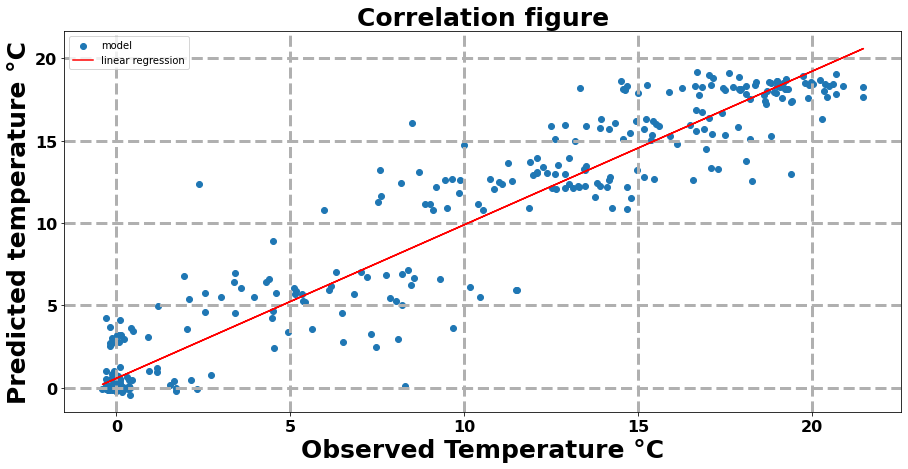

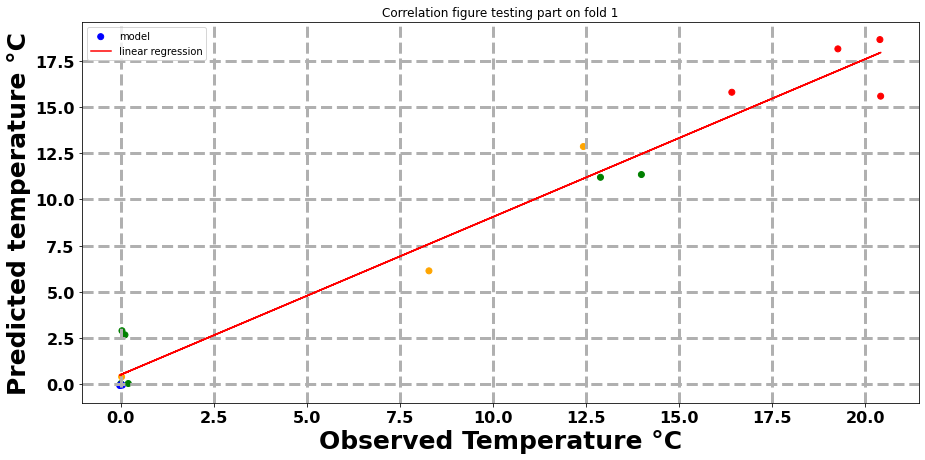

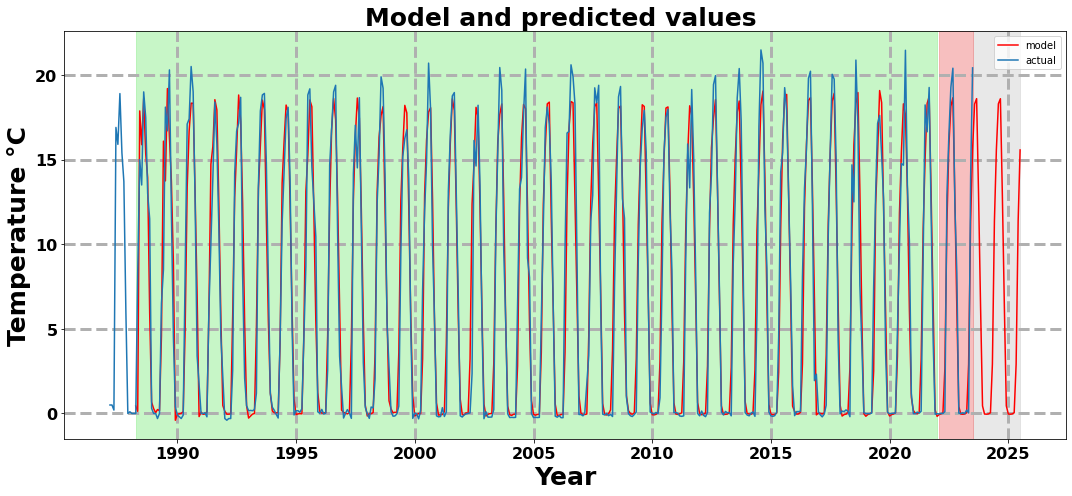

In [35]:

data_Temp=monthly_avg_temp_fillmean.to_frame()
for fold in range(0,1):
    
    plotSARIMA(fold,data_Temp,trained_models_T["{}".format(fold)],test_bank_T[fold],train_bank_T[fold],x_label_corr="Observed Temperature °C", y_label_corr="Predicted temperature °C",value_pred="Temperature °C",corr_title='Correlation figure', pred_title="Model and predicted values")












In [38]:
def plot_corr_plot(train_bank, modeled_values,x_label_corr,y_label_corr,fold): 
    #train_bank = train_bank.drop('saison', axis=1)
    x = train_bank["Dissolved Oxygen mg/L"].values
    y = modeled_values.values
    
    

    slope, intercept, r_value, _, _ = linregress(x, y)
    r_squared=r_value**2
    # Plot model vs predicted values and regression line
    plt.figure(figsize=(15, 7))
    plt.title("Correlation figure"+ ' training part ',fontsize=25, fontweight='bold')
     # Créer une colonne vide pour les saisons

# Parcourir chaque date dans l'index
 

# Rest of the code remains the same
 
    plt.scatter(x, y, label="model")
    plt.plot(x, slope * x + intercept, color='r', label='linear regression')
    plt.plot()
    plt.xlabel(x_label_corr,fontsize=25, fontweight='bold')
    plt.ylabel(y_label_corr,fontsize=25, fontweight='bold')
    plt.xticks(fontsize=16,fontweight='bold')
    plt.yticks(fontsize=16,fontweight='bold')
    plt.legend()
    plt.grid(True,linewidth=3, linestyle='--', alpha=1)
    #plt.annotate(f'R² = {r_squared:.2f} \n slope={ slope:.2f}\n intercept= {intercept:.2f}', xy=(np.max(x)/1.5, np.max(y)/4), xycoords='data', color='black', ha='center', va='center',fontsize=15)
    plt.savefig(r'C:\Users\Samuel\Desktop\Rendu SPI\O2linregtrainTOAAAAA {}.jpg'.format(fold+1))

    print('R squared_train: {:.2f} \nSlope_train: {:.2f} \nIntercept_train: {:.2f}'.format(r_squared, slope, intercept))
    Root_Mean_squared_error =np.sqrt( mean_squared_error(x,y))
    Median_absolute_error=median_absolute_error(x,y)
    Mean_absolute_error=mean_absolute_error(x,y)
    Moyenne_des_erreurs=(Root_Mean_squared_error+Median_absolute_error+Mean_absolute_error)/3
    #Mean_squared_log_error=mean_squared_log_error(test_bank_T, forecast[start_index:end_index])
    Mean_absolute_percentage_error=mean_absolute_percentage_error(x,y)
    
    Errors_formulas=["Root_Mean_squared_error","Median_absolute_error","Mean_absolute_error","Moyenne_des_erreurs","Mean_absolute_percentage_error",]
    Errors_values=[Root_Mean_squared_error,Median_absolute_error,Mean_absolute_error,Moyenne_des_erreurs,Mean_absolute_percentage_error,]
    
    
    data_error=pd.DataFrame([Errors_formulas, Errors_values])
    
    data_error.to_csv(r'C:\Users\Samuel\Desktop\Rendu SPI\Erreurs_O2_train TOA {}.csv'.format(fold+1), index=False)

    return 

Train on 95.88 % of the dataset, fold 1
Test on 4.12 % of the dataset, fold 1
R squared_train: 0.72 
Slope_train: 0.73 
Intercept_train: 2.75


C:\Users\Samuel\.conda\envs\spyder-cf\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Fold number 1 
 R squared: 0.86 
Slope: 0.67 
Intercept: 3.43


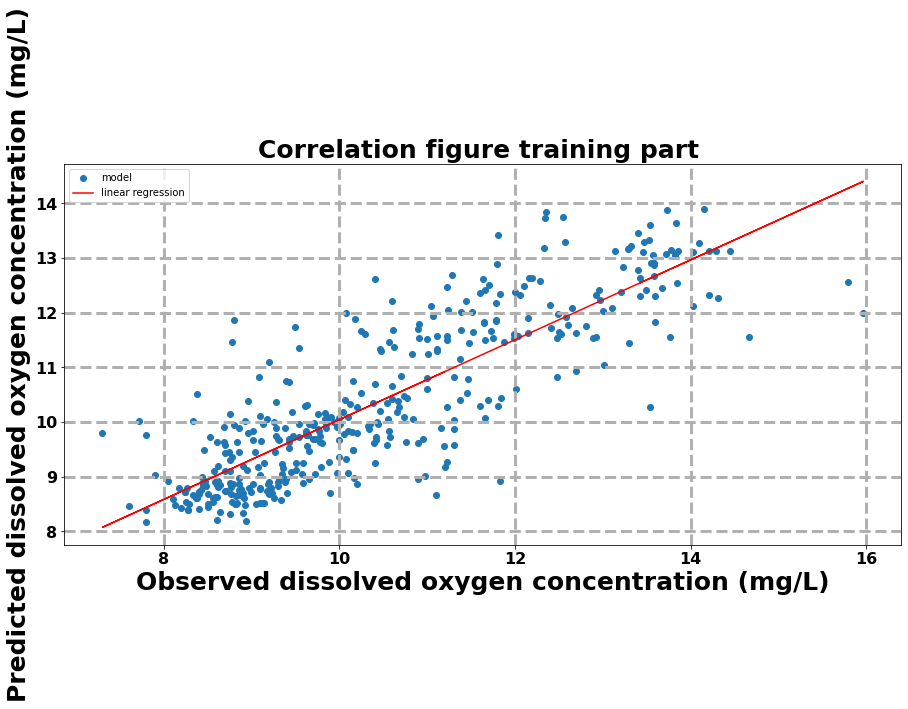

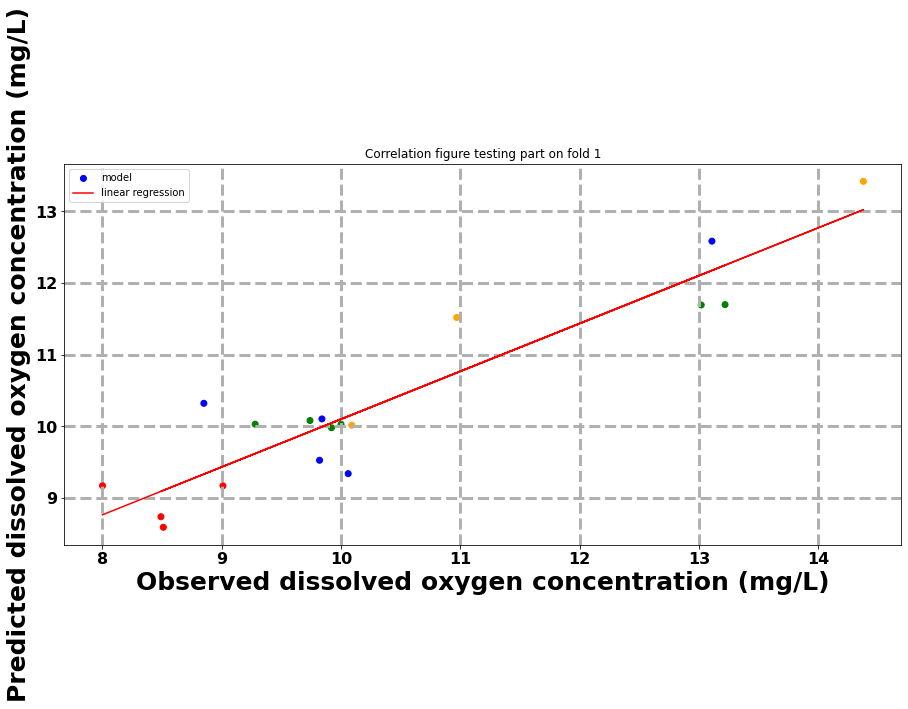

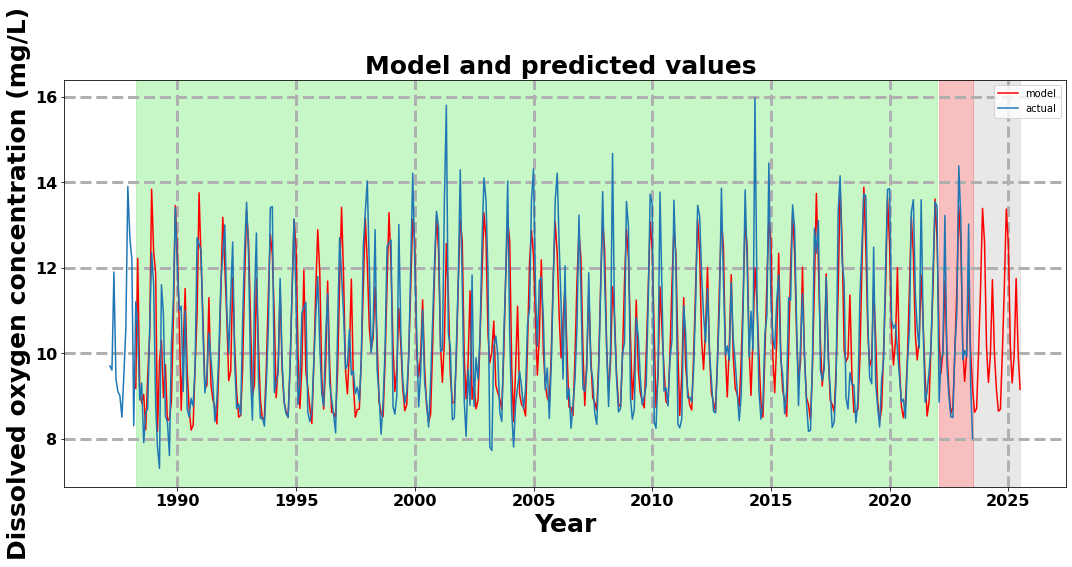

In [39]:
data_O2=monthly_avg_O2_fillmean.to_frame()


for fold in range(0,1): 
    plotSARIMA(fold,data_O2,trained_models_O2["{}".format(fold)],test_bank_O2[fold],train_bank_O2[fold],x_label_corr="Observed dissolved oxygen concentration (mg/L)", y_label_corr="Predicted dissolved oxygen concentration (mg/L)",value_pred="Dissolved oxygen concentration (mg/L)",corr_title='Correlation figure', pred_title="Model and predicted values")









